# Visualization of fluid channel models

This notebook is designed for visualization of models of refrigerant
flowing through a microfluidic channel.

Created on Wed Mar 25 9:45:13 2020  
author: ericmuckley@gmail.com

Full repository can be viewed at  
https://github.com/ericmuckley/fluid_channel_modeling

In [1]:
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# change matplotlib settings to make plots look nicer
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.minor.width'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.minor.width'] = 3
plt.rcParams['ytick.major.width'] = 3

### Get model list

Here we get a list of all the model file names and load the model parameter file.

In [2]:
# set path of folder which contains image files
folder_path = os.path.join(os.getcwd(), 'models')
all_models = [m for m in glob(folder_path+'/*') if '.npy' in m]
print('Found {} models:'.format(len(all_models)))
for m in all_models:
    print(os.path.split(m)[1])

# get model information file
model_info_path = os.path.join(os.getcwd(), 'model_info.npy')
m_info = np.load(model_info_path, allow_pickle=True)[()]
print('\nModel info keys:')
print(list(m_info))

Found 10 models:
75lbh000010__model.npy
75lbh000020__model.npy
75lbh000030__model.npy
75lbh000040__model.npy
75lbh000050__model.npy
75lbh000060__model.npy
75lbh000070__model.npy
75lbh000080__model.npy
75lbh000090__model.npy
75lbh000100__model.npy

Model info keys:
['w_um', 'h_um', 'd_um', 'um_per_pixel', 'buffer_um', 'min_rad_um', 'max_rad_um', 'num_of_bubbles_to_try', 'channels']


### Define some functions to use later

In [3]:
def plot_setup(labels=['X', 'Y'], fsize=18, setlimits=False,
               limits=[0,1,0,1], title='',
               legend=False, save=False, filename='plot.jpg'):
    """Creates a custom plot configuration to make graphs look nice.
    This can be called with matplotlib for setting axes labels,
    titles, axes ranges, and the font size of plot labels.
    This should be called between plt.plot() and plt.show() commands."""
    plt.xlabel(str(labels[0]), fontsize=fsize)
    plt.ylabel(str(labels[1]), fontsize=fsize)
    plt.title(title, fontsize=fsize)
    fig = plt.gcf()
    if legend:
        plt.legend(fontsize=fsize-4)
    if setlimits:
        plt.xlim((limits[0], limits[1]))
        plt.ylim((limits[2], limits[3]))
    if save:
        fig.savefig(filename, dpi=120, bbox_inches='tight')
        plt.tight_layout()

def plot_channel_image(image, title=None, vmin=0, vmax=1):
    """Plot image of the channel, colored by void fraction."""
    plt.imshow(image, origin='lower', cmap='jet', vmin=vmin, vmax=vmax, )
    fig = plt.gcf()
    fig.set_size_inches(11,11)
    plt.axis('off')
    if title is not None:
        plt.title(title, fontsize=16)
    plt.show()

## Read and display models

75lbh000010
temp: 10
flowrate: 75
total simulated bubbles: 22016
model error (%): 3.9


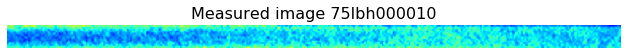

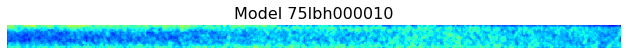



75lbh000020
temp: 20
flowrate: 75
total simulated bubbles: 21876
model error (%): 3.9


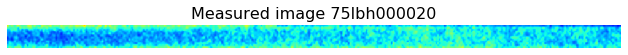

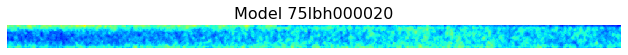



75lbh000030
temp: 30
flowrate: 75
total simulated bubbles: 22206
model error (%): 3.75


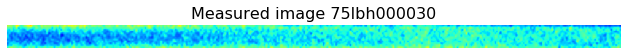

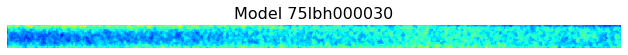



75lbh000040
temp: 40
flowrate: 75
total simulated bubbles: 23170
model error (%): 3.38


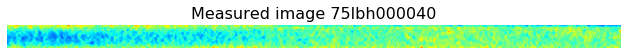

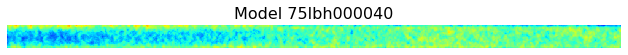



75lbh000050
temp: 50
flowrate: 75
total simulated bubbles: 23795
model error (%): 3.2


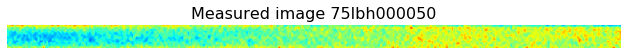

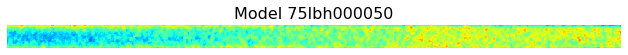



75lbh000060
temp: 60
flowrate: 75
total simulated bubbles: 24103
model error (%): 3.15


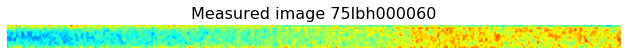

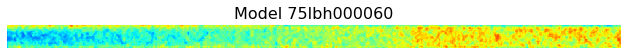



75lbh000070
temp: 70
flowrate: 75
total simulated bubbles: 25289
model error (%): 2.96


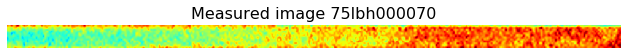

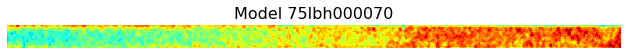



75lbh000080
temp: 80
flowrate: 75
total simulated bubbles: 25344
model error (%): 2.87


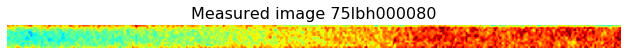

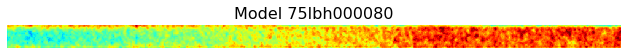



75lbh000090
temp: 90
flowrate: 75
total simulated bubbles: 25494
model error (%): 2.67


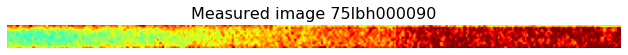

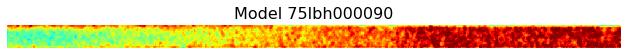



75lbh000100
temp: 100
flowrate: 75
total simulated bubbles: 25743
model error (%): 2.57


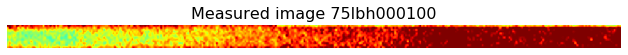

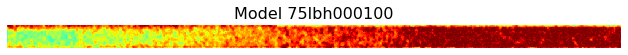

In [4]:
# create dictionary to hold all model results
r = {
    'flowrate': [],
    'label': [],
    'rad': [],
    'cent': [],
    'temp': [],
    'w_profiles': np.empty((int(m_info['w_um']/m_info['um_per_pixel']), 0)),
    'h_profiles': np.empty((int(m_info['h_um']/m_info['um_per_pixel']), 0))}

# loop over each model file
for model in all_models:
    
    # load model dictionary from file 
    m = np.load(model, allow_pickle=True)[()]
    # accumulate all data into dictionary
    r['flowrate'].append(m['flowrate'])
    r['label'].append(m['label'])
    r['rad'].append(m['rad'])
    r['cent'].append(m['cent'])
    r['temp'].append(m['temp'])
    
    # get average void fraction profiles in width and height directions
    r['h_profiles'] = np.column_stack((r['h_profiles'], np.mean(m['img_model'], axis=1)))
    r['w_profiles'] = np.column_stack((r['w_profiles'], np.mean(m['img_model'], axis=0)))
    
    # plot original image and modeled image
    print(m['label'])
    print('temp: {}'.format(m['temp']))
    print('flowrate: {}'.format(m['flowrate']))
    print('total simulated bubbles: {}'.format(len(m['rad'])))
    print('model error (%): {}'.format(round(m['percent_error'], 2)))
    plot_channel_image(m['img_voidfrac'],
                       title='Measured image '+ m['label'],
                       vmax=m_info['d_um'])
    plot_channel_image(m['img_model'],
                       title='Model '+ m['label'],
                       vmax=m_info['d_um'])
    print('==========================================================\n\n')

## Plot model statistics

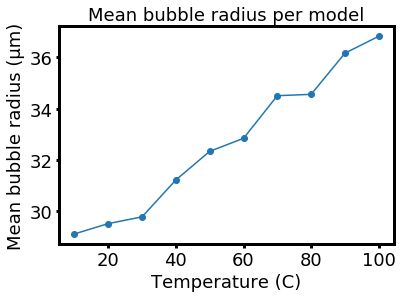

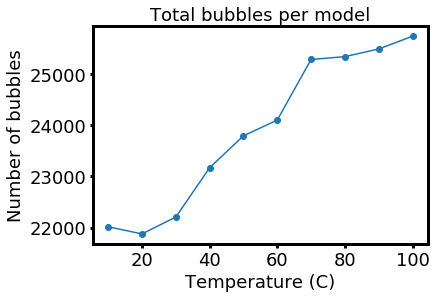

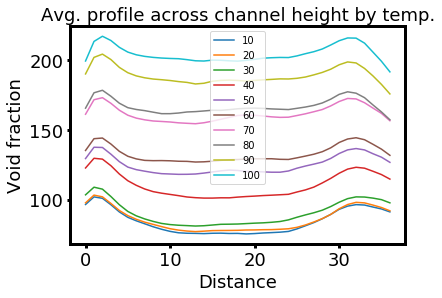

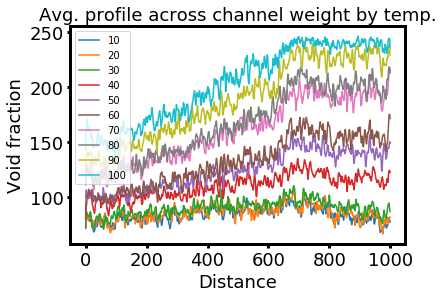

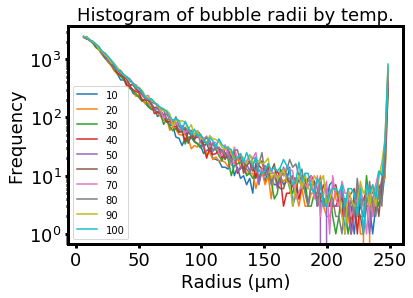

In [5]:
# plot mean bubble radii across all models
mean_rad = np.array([np.mean(i) for i in r['rad']])*m_info['um_per_pixel']
plt.plot(r['temp'], mean_rad, marker='o')
plot_setup(title='Mean bubble radius per model',
           labels=['Temperature (C)', 'Mean bubble radius (μm)'])
plt.show()

# plot total bubbles across all models
tot_bubs = [len(i) for i in r['rad']]
plt.plot(r['temp'], tot_bubs, marker='o')
plot_setup(title='Total bubbles per model',
           labels=['Temperature (C)', 'Number of bubbles'])
plt.show()


# plot void fraction profiles across height of channel
for p in range(len(r['h_profiles'][0])):
    plt.plot(r['h_profiles'][:, p], label=r['temp'][p])
plot_setup(title='Avg. profile across channel height by temp.',
           labels=['Distance', 'Void fraction'])
plt.legend()
plt.show()

# plot void fraction profiles across width of channel
for p in range(len(r['w_profiles'][0])):
    plt.plot(r['w_profiles'][:, p], label=r['temp'][p])
plot_setup(title='Avg. profile across channel weight by temp.',
           labels=['Distance', 'Void fraction'])
plt.legend()
plt.show()


# plot histogram of bubble radius distribution
for i in range(len(r['rad'])):
    radii_hist, radii_hist_bins = np.histogram(r['rad'][i], bins=100)
    bincenters = 0.5*(radii_hist_bins[1:] + radii_hist_bins[:-1]) * m_info['um_per_pixel']
    plt.plot(bincenters, radii_hist, label=r['temp'][i])
plot_setup(title='Histogram of bubble radii by temp.', labels=['Radius (μm)', 'Frequency'])
plt.yscale('log')
plt.legend()
plt.show()

## Testing physical relevance of bubble configuration

Use this equality to test physical relevance of bubble configuration
by considering curvature (2 / bubble radius) and the gradient of the
void fraction (a).

2/radius = divergence(gradient(a)/norm(gradient(a)))


κ=∇.(∇α/|∇α| )

α is the void fraction
κ is the curvature
∇ is the gradient operator
∇. is the divergence

Test this on the flows
We know κ = 2/R where R is the radius of the bubble. 

75lbh000010


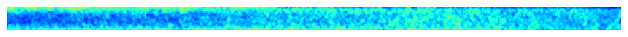

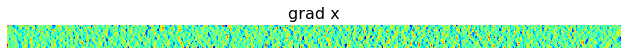

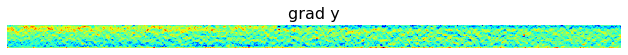

(37, 1000) (37, 1000)


75lbh000020


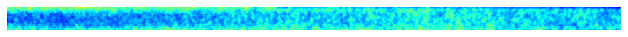

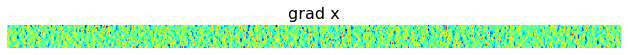

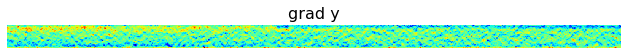

(37, 1000) (37, 1000)


75lbh000030


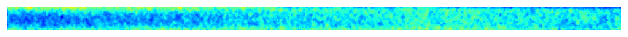

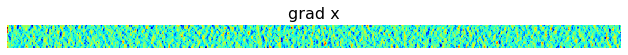

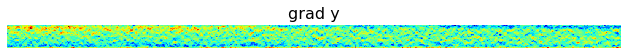

(37, 1000) (37, 1000)


75lbh000040


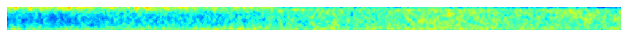

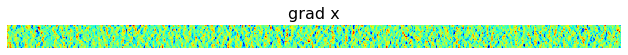

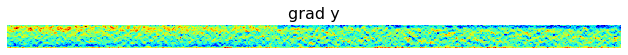

(37, 1000) (37, 1000)


75lbh000050


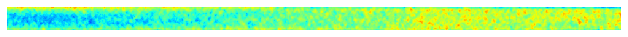

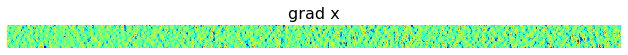

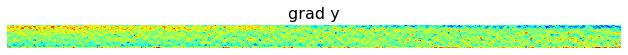

(37, 1000) (37, 1000)


75lbh000060


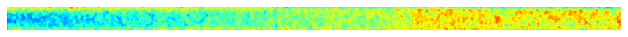

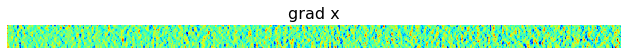

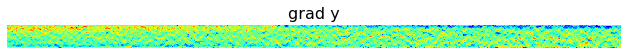

(37, 1000) (37, 1000)


75lbh000070


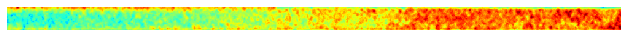

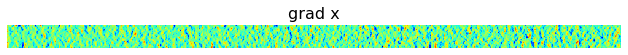

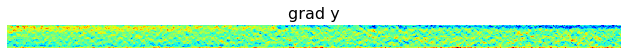

(37, 1000) (37, 1000)


75lbh000080


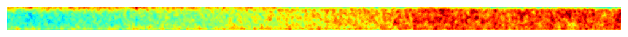

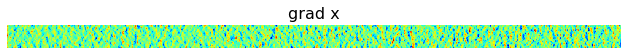

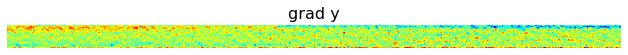

(37, 1000) (37, 1000)


75lbh000090


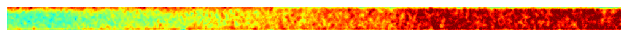

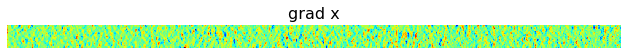

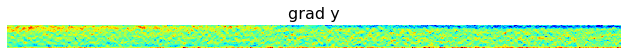

(37, 1000) (37, 1000)


75lbh000100


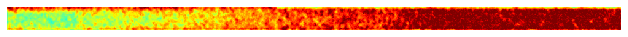

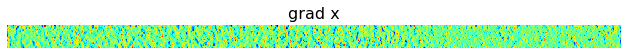

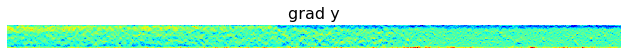

(37, 1000) (37, 1000)




In [6]:
# loop over each model file
for model in all_models:
    
    # load model dictionary from file 
    m = np.load(model, allow_pickle=True)[()]
    
    print(m['label'])
    
    plot_channel_image(m['img_model'], vmax=m_info['d_um'])
    tot_grad = np.gradient(m['img_model'])
    grad_x = tot_grad[1]
    plot_channel_image(grad_x, title='grad x', vmin=None, vmax=None)
    grad_y = tot_grad[0]
    plot_channel_image(grad_y, title='grad y', vmin=None, vmax=None)
    print(grad_x.shape, grad_y.shape)
    print('=====================================================\n\n')